## Домашняя работа по теорверу. Автор: Гимадиев А.Ф.

### Задание 3. Задача 56 про китайский ресторан.

Для начала кратко перескажу условие задачи. Есть китайский ресторан, где на момент времени $t=0$ сидит $n=0$ человек. Раз в минуту в ресторан входит очередной посетитель и видит, что в ресторане сидит уже $n$ человек. Таким образом, $t=n-1,~t>0$. Посетитель, пришедший в момент времени $t$, с  вероятностью $\dfrac{\theta}{n+\theta}=\dfrac{\theta}{t-1+\theta}$ сядет за отдельный столик, с вероятностью же $1-\dfrac{\theta}{n+\theta}=1-\dfrac{\theta}{t-1+\theta}=\dfrac{t-1}{t-1+\theta}$ присоединится к одному из уже занятых столиков. 

Вопрос: Каково ожидаемое число занятых столиков на момент времени $t$? Обозначим за $\mathbb{E}(k_t)$.

###### Решение. 

Идея решения состоит в том, что для подсчёта матожидания количества занятых столиков в момент времени $t$ мы будем отталкиваться от данных в момент времени $t-1$. К моменту времени $t$, пока ещё не зашёл посетитель, количество уже занятых столов является случайной величиной, принимающей значения от 1 до $t-1$ с определёнными вероятностями. Далее количество занятых столиков либо возрастает на 1 с известной вероятностью либо остаётся неизменным. 

$\mathbb{E}(к_1)=1$, что очевидно. Человек приходит и с вероятностью 1 садится за отдельный стол. 

$\mathbb{E}(к_2)=1\times \dfrac{1}{\theta+1}+2\times\dfrac{\theta}{\theta+1}$, так как с вероятностью $\dfrac{1}{\theta+1}$ человек присоединится к занятому столику, иначе сядет за второй стол. 

$\mathbb{E}(к_3)=\dfrac{1}{\theta+1}\left(1\times \dfrac{2}{\theta+2}+2\times\dfrac{\theta}{\theta+2}\right)+\dfrac{\theta}{\theta+1}\left( 2\times\dfrac{2}{\theta+2}+3\times\dfrac{\theta}{\theta+2}\right)=1\times\dfrac{2!}{(\theta+1)(\theta+2)}+2\times 3\dfrac{\theta}{(\theta+1)(\theta+2)}+3\times\dfrac{\theta^2}{(\theta+1)(\theta+2)}$

$~$

\begin{multline*}
\mathbb{E}(к_4)=\dfrac{2!}{(\theta+1)(\theta+2)}\left( 1\times\dfrac{3}{\theta+3}+2\times\dfrac{\theta}{\theta+3} \right)+3\dfrac{\theta}{(\theta+1)(\theta+2)}\left( 2\times\dfrac{3}{\theta+3}+3\times\dfrac{\theta}{\theta+3} \right)+\dfrac{\theta^2}{(\theta+1)(\theta+2)}\left( 3\times\dfrac{3}{\theta+3}+4\times\dfrac{\theta}{\theta+3} \right)=\\=1\times\left( \dfrac{3!}{(\theta+1)(\theta+2)(\theta+3)} \right)+2\times\left( \dfrac{11\theta}{(\theta+1)(\theta+2)(\theta+3)} \right)+3\times\left( \dfrac{6\theta^2}{(\theta+1)(\theta+2)(\theta+3)} \right)+4\times\left( \dfrac{\theta^3}{(\theta+1)(\theta+2)(\theta+3)} \right)
\end{multline*}

Что мы имеем?

$$\mathbb{E}(k_t)=\sum_{j=1}^t j\times a_{tj}\times \dfrac{\theta^{j-1}}{(\theta+1)(\theta+2)\dots(\theta+t-1)},$$ где $j$ - число занятых столов, $a_{tj}\times \dfrac{\theta^{j-1}}{(\theta+1)(\theta+2)\dots(\theta+t-1)}$ - вероятность того, что именно такое количество столов будет занято. Понятно, откуда берётся дробь $$\dfrac{\theta^{j-1}}{(\theta+1)(\theta+2)\dots(\theta+t-1)},$$ ведь чтобы было занято $j$ столов, нужно, чтобы $j-1$ человек решили сесть за отдельные столики, когда только пришли в ресторан (первого человека не считаем, он садился за отдельный стол с вероятностью 1). 

Теперь нужно понять, как строятся числа $a_{tj}$. Как мы получаем в момент времени $t$ всего $j$ занятых столиков? Либо в момент времени $t-1$ было также занято всего $j$ столиков, тогда с вероятностью $\dfrac{t-1}{t-1+\theta}$ это число сохранится, либо в момент времени $t-1$ было занято $j-1$ столиков, тогда с вероятностью $\dfrac{\theta}{t-1+\theta}$ их число увеличится на один. Имеем: $$a_{tj}=(t-1)a_{(t-1)j}+a_{(t-1)(j-1)}$$

Попытками выразить элемент $a_{tj}$ через $t$ и $j$ через производящие функции от двух переменных доводим себя до депрессивных мыслей о собственном ничтожестве, после чего почти случайно узнаём у однокурсника с матфака, что я пытаюсь посчитать ЧИСЛА СТИРЛИНГА ПЕРВОГО РОДА БЕЗ ЗНАКА. Имеем: $$\mathbb{E}(k_t)=\sum_{j=1}^t jc(t,j)\dfrac{\theta^{j-1}}{(\theta+1)(\theta+2)\dots(\theta+t-1)}=\left(\sum_{l=0}^t c(t,l)\theta^l\right)^{-1}\left(\sum_{j=1}^tjc(t,j)\theta^j\right),~t>1$$

### Задача 2.1

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ggplot as gp
import math as math
import scipy as sp
from scipy import stats
from scipy.stats import rayleigh

%matplotlib inline

import timeit as t
from pylab import *
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import ml_metrics, string, re, pylab as pl
import random
import csv
from ggplot import *

In [16]:
sample=[]

In [17]:
for i in range(50):
    sample.append([])

In [18]:
for i in range(50):
    sample[i]=np.random.uniform(0, 1, 1000)

#сгенерировали 1000 рандомных точек для каждого из 50 распределений

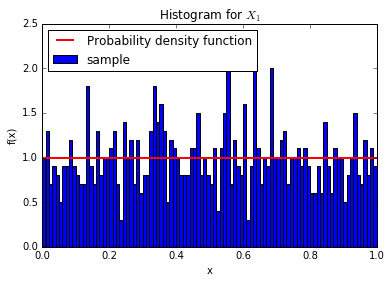

In [30]:
fig, ax = plt.subplots(1, 1)

# строим график функции плотности и гистограмму распределений
x = np.linspace(0, 1, 100)
count, bins, ignored = plt.hist(sample[0], 100, normed=True, label='sample')
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r', label='Probability density function')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Histogram for $X_1$')

plt.legend(loc='best')

Я так понимаю, что задание про сумму непрерывных независимых случайных величин связано с ЦПТ, поэтому ещё добавил к гистограммам соответствующие нормальные распределения.

In [31]:
#генерим выборки для сумм случайных величин

sample_3=[]
k=0
for i in range(1000):
    k = sample[0][i]+sample[1][i]+sample[2][i]
    sample_3.append(k)
    k=0

sample_10=[]
for i in range(1000):
    for l in range(10):
        k = k+sample[l][i]
    sample_10.append(k)
    k=0
    
sample_50=[]
for i in range(1000):
    for l in range(50):
        k = k+sample[l][i]
    sample_50.append(k)
    k=0

In [32]:
#это матожидание и дисперсия равомерного распределения X_i

m=0.5
disp=1/12

In [33]:
#это дисперсии нормальных распределений, которыми будет аппроксимировать суммы данных случайных величин

disp_1=disp*3
disp_2=disp*10
disp_3=disp*50

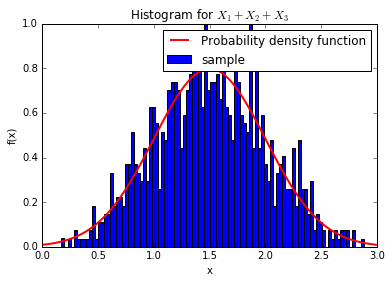

In [34]:
fig, ax = plt.subplots(1, 1)

# строим график функции плотности
x = np.linspace(0, 3, 100)

values = plt.hist(sample_3, normed=True, bins=100, label='sample')

pdf_3 = (1/(sqrt(disp_1)*sqrt(2*pi)))*exp(-(x-3*m)*(x-3*m)/(2*disp_1))
plt.plot(x, pdf_3, 'r-', lw=2, label='Probability density function')

plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Histogram for $X_1+X_2+X_3$')

plt.legend(loc='best')

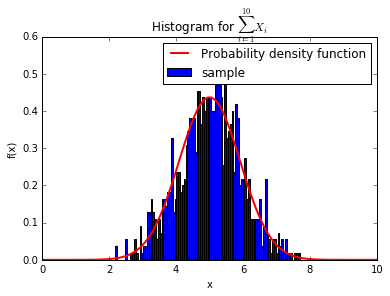

In [35]:
fig, ax = plt.subplots(1, 1)

# строим график функции плотности
x = np.linspace(0, 10, 100)

values = plt.hist(sample_10, normed=True, bins=100, label='sample')

pdf_10 = (1/(sqrt(disp_2)*sqrt(2*pi)))*exp(-(x-10*m)*(x-10*m)/(2*disp_2))
plt.plot(x, pdf_10, 'r-', lw=2, label='Probability density function')

plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Histogram for $\sum_{i=1}^{10} X_i$')

plt.legend(loc='best')

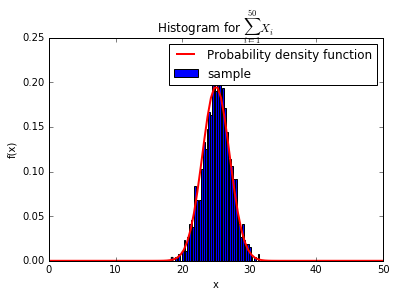

In [36]:
fig, ax = plt.subplots(1, 1)

# строим график функции плотности
x = np.linspace(0, 50, 100)

values = plt.hist(sample_50, normed=True, bins=50, label='sample')

pdf_50 = (1/(sqrt(disp_3)*sqrt(2*pi)))*exp(-(x-50*m)*(x-50*m)/(2*disp_3))
plt.plot(x, pdf_50, 'r-', lw=2, label='Probability density function')

plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Histogram for $\sum_{i=1}^{50} X_i$')

plt.legend(loc='best')

Как видим, при $n\to\infty$ $\sum\limits_{i=1}^n X_i$ всё лучше и лучше приближается $N(n\mu,n\sigma^2)$.

### Задача 2.2

In [37]:
k=0
for i in range(1000):
    if sample_3[i]>2:
        k=k+1
probability = k/1000
print('probabilty is equal to',probability)

probabilty is equal to 0.157


Получаем, что $\mathbb{P}\left(\sum\limits_{i=1}^3 X_i >2\right)\approx $ "значение probabilty". 

Теперь же посчитаем это вручную (используя WolframAplha конечно же) при помощи ЦТП и получим: $$\mathbb{P}(X_1+X_2+X_3>2)=\int_2^\infty \dfrac{2}{\sqrt{2\pi}}e^{-2(x-3/2)^2}dx\approx 0.158655$$

### Задача 2.3

Найдём $v_5=\mathbb{E}[X_1^5]$

In [38]:
v=0
for j in range(1000):
    v=v+pow(sample[0][j],5)/1000
print('Пятый начальный момент равен',v)

Пятый начальный момент равен 0.159311890315


В идеале это должно быть $v_5=\int_0^1x^5dx=\dfrac{1}{6}=0,16666666666$

Теперь поищем $var\left(\dfrac{X_1}{1+X_2^2}\right)$.

In [39]:
c=0
samplesample=[]
for j in range(1000):
    c=sample[0][j]/(1+pow(sample[1][j],2))
    samplesample.append(c)
    c=0

In [40]:
average=0
for j in range(1000):
    average = average + samplesample[j]
average=average/1000
average

0.39298618364568599

In [41]:
var=0
for j in range(1000):
    var=var+pow((samplesample[j]-average),2)
var=var/999
print('дисперсия примерно равна',var)

дисперсия примерно равна 0.0582073472316


### Задача 2.4

In [42]:
sample_op=[]
h=0
for j in range(1000):
    h=(1+sample[0][j])/(3+sample[1][j])
    sample_op.append(h)
    h=0
sample_op.sort()

In [44]:
mediana = (sample_op[499]+sample_op[500])/2
print('медиана примерно равна',mediana)

медиана примерно равна 0.424933107156


In [45]:
kvantil = (sample_op[249]+sample_op[250])/2
print('25% квантиль примерно равен',kvantil)

25% квантиль примерно равен 0.358009291635


### Задача 1

In [78]:
pd.set_option('display.max_columns', 100)

Решил взять достаточно заезженный датасет про пассажиров Титаника и построить свои графики.

In [79]:
data = pd.read_csv('C:\\Users\\Азат\\Desktop\\домашка по теорверу\\train.csv', sep=',', decimal=',')
data[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


survival = Survival
                (0 = No; 1 = Yes)
                
pclass       =   Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
                
name        =    Name

sex          =   Sex

age           =  Age

sibsp          = Number of Siblings/Spouses Aboard

parch           = Number of Parents/Children Aboard

ticket      =    Ticket Number

fare        =    Passenger Fare

cabin       =    Cabin

embarked   =     Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

In [80]:
data.count(axis=0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Видим, что пропущено достаточно много значений в столбце "Возраст" и "Номер кабины". В приниципе возраст пассажиров анализировать ещё можно, а вот столбцом "Cabin" лучше не пользоваться. 

#### График 1.

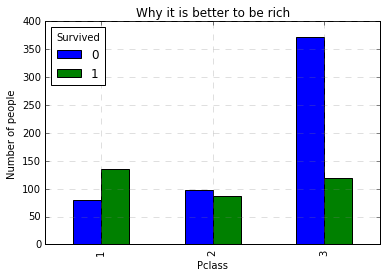

In [88]:
plt.figure(figsize=(15,10))
data.pivot_table('PassengerId', ['Pclass'], 'Survived', 'count').plot(kind='bar', title='Why it is better to be rich')
plt.grid(True, which='major', color='grey', linestyle='dashed', alpha=0.5)
plt.xlabel('Pclass')
plt.ylabel('Number of people')

Как видим, среди выживших примерное одинаковое количество людей из всех классов. Но у пассажира первого класса отношение "спасшиеся/погибшие" куда выше чем у остальных.

#### График 2.

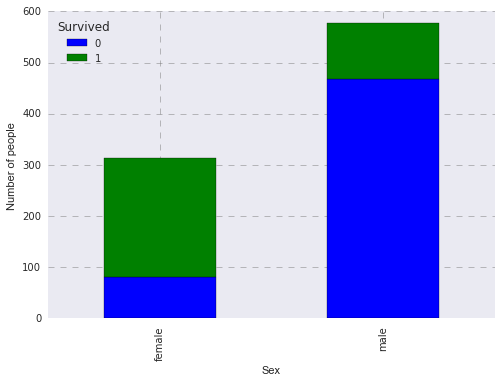

In [184]:
plt.figure(figsize=(15,10))
data.pivot_table('PassengerId', 'Sex', 'Survived', 'count').plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.grid(True, which='major', color='grey', linestyle='dashed', alpha=0.5)

Сначала женщины и дети. Следствием применения этого принципа стало спасение 74% женщин и 52% детей, тогда как среди мужчин выжило лишь 20%.

#### График 3.

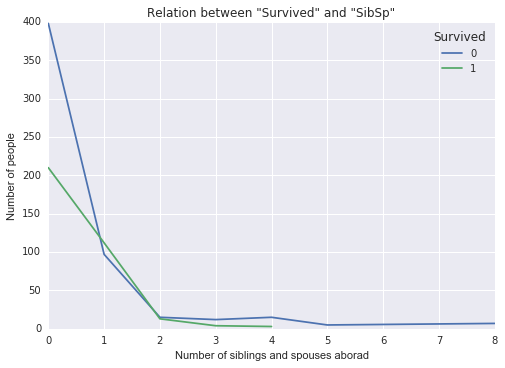

In [172]:
data.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(title='Relation between "Survived" and "SibSp"')
plt.xlabel('Number of siblings and spouses aborad')
plt.ylabel('Number of people')

Если смотреть на выживших, то больше спасались "одиночки", то есть те, кто не имел родственников на корабле. Это и логично, ведь аморально покидать корабль, оставляя умирать своих близких. А со всеми родственниками занять целую шлюпку достаточно сложно.

#### График 4.

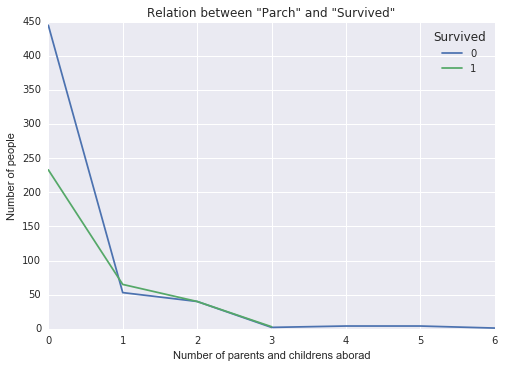

In [176]:
data.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(title='Relation between "Parch" and "Survived"')
plt.xlabel('Number of parents and childrens aborad')
plt.ylabel('Number of people')

Опять же, предположение из "Графика 3" подтверждается. 

Извиняюсь, но я очень не дружу с графиками, поэтому имеет смысл закончить на этом пункте, чтобы не плодить одинаковые и бессмысленные  графики.